In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Project variables

In [2]:
m_name = "model comparison"
p_dir = os.path.join("../combo models", m_name)

In [3]:
def create_dir(dir_path: str):
    if not os.path.exists(dir_path):
        os.mkdir(dir_path)

In [4]:
def clear_dir(dir_path: str):
    for item in os.listdir(dir_path):
        fp = os.path.join(dir_path, item)
        if os.path.isfile(fp):
            os.remove(fp)
        if os.path.isdir(fp):
            rmtree(fp)

In [5]:
create_dir(p_dir)
clear_dir(p_dir)

# Load model predictions

In [6]:
img_model = os.path.join("../img models", "densenet_2_classes_bce_test4")
img_pred = pd.read_pickle(os.path.join(img_model, "y_pred_test.pkl"))
img_pred = pd.Series(img_pred, name="pred")
img_x = pd.read_pickle(os.path.join(img_model, "x_test.pkl"))
img_gt = pd.read_pickle(os.path.join(img_model, "y_test.pkl"))

In [7]:
nlp_model =os.path.join("../nlp models", "distilbert_2_classes_v2")
nlp_pred = pd.read_pickle(os.path.join(nlp_model, "y_pred_test.pkl"))
nlp_pred = pd.Series(nlp_pred, name="pred")
nlp_x = pd.read_pickle(os.path.join(nlp_model, "x_test.pkl"))
nlp_gt = pd.read_pickle(os.path.join(nlp_model, "y_test.pkl"))

In [8]:
for df in [img_x, img_gt, img_pred, nlp_x, nlp_gt, nlp_pred]:
    df.reset_index(drop=True, inplace=True)

In [9]:
img = pd.concat([img_x, img_gt, img_pred], axis=1)
img.rename(columns={"qtl": "truth"}, inplace=True)
img = img.loc[:, ["id_video", "title", "channel_name", "ln_vc_norm", "truth", "pred"]]

nlp = pd.concat([nlp_x, nlp_gt, nlp_pred], axis=1)
nlp.rename(columns={"qtl": "truth"}, inplace=True)
nlp = nlp.loc[:, ["id_video", "title", "channel_name", "ln_vc_norm", "truth", "pred"]]

In [10]:
combo = img.merge(nlp.loc[:, ["id_video", "pred"]], how="left", on="id_video", suffixes=["", "_nlp"])
combo.head()

,id_video,title,channel_name,ln_vc_norm,truth,pred,pred_nlp
0,1fyS5wqaAS8,"""Hey Bill Nye, Don't Forget the Dioxins!""",StarTalk,-4.226734,very low,very low,very high
1,sCMVw2SJLy4,Live Show - Periodic Table of Videos,Periodic Videos,-4.478711,very low,very low,very high
2,ZbdMMI6ty0o,Why Are We Morbidly Curious?,Vsauce,-0.807534,very high,very high,very high
3,nbuM0aJjVgE,The Mughal Empire and Historical Reputation: C...,CrashCourse,-1.519372,very high,very high,very high
4,McojvctVsUs,C++ Basics For Beginners | Learn C++ Programmi...,Simplilearn,-4.466001,very low,very low,very low


In [11]:
cats = ["very low", "very high"]
combo.pred = pd.Categorical(combo.pred, categories=cats, ordered=True)
combo.pred_nlp = pd.Categorical(combo.pred_nlp, categories=cats, ordered=True)
combo.truth = pd.Categorical(combo.truth, categories=cats, ordered=True)

In [12]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1932 entries, 0 to 1931
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id_video      1932 non-null   object  
 1   title         1932 non-null   object  
 2   channel_name  1932 non-null   object  
 3   ln_vc_norm    1932 non-null   float64 
 4   truth         1932 non-null   category
 5   pred          1932 non-null   category
 6   pred_nlp      1932 non-null   category
dtypes: category(3), float64(1), object(3)
memory usage: 81.5+ KB


In [13]:
combo["img_corr"] = False
combo["img_corr"] = (combo.truth == combo.pred)
combo["nlp_corr"] = False
combo["nlp_corr"] = (combo.truth == combo.pred_nlp)

In [14]:
combo.head()

,id_video,title,channel_name,ln_vc_norm,truth,pred,pred_nlp,img_corr,nlp_corr
0,1fyS5wqaAS8,"""Hey Bill Nye, Don't Forget the Dioxins!""",StarTalk,-4.226734,very low,very low,very high,True,False
1,sCMVw2SJLy4,Live Show - Periodic Table of Videos,Periodic Videos,-4.478711,very low,very low,very high,True,False
2,ZbdMMI6ty0o,Why Are We Morbidly Curious?,Vsauce,-0.807534,very high,very high,very high,True,True
3,nbuM0aJjVgE,The Mughal Empire and Historical Reputation: C...,CrashCourse,-1.519372,very high,very high,very high,True,True
4,McojvctVsUs,C++ Basics For Beginners | Learn C++ Programmi...,Simplilearn,-4.466001,very low,very low,very low,True,True


In [15]:
combo.head()

,id_video,title,channel_name,ln_vc_norm,truth,pred,pred_nlp,img_corr,nlp_corr
0,1fyS5wqaAS8,"""Hey Bill Nye, Don't Forget the Dioxins!""",StarTalk,-4.226734,very low,very low,very high,True,False
1,sCMVw2SJLy4,Live Show - Periodic Table of Videos,Periodic Videos,-4.478711,very low,very low,very high,True,False
2,ZbdMMI6ty0o,Why Are We Morbidly Curious?,Vsauce,-0.807534,very high,very high,very high,True,True
3,nbuM0aJjVgE,The Mughal Empire and Historical Reputation: C...,CrashCourse,-1.519372,very high,very high,very high,True,True
4,McojvctVsUs,C++ Basics For Beginners | Learn C++ Programmi...,Simplilearn,-4.466001,very low,very low,very low,True,True


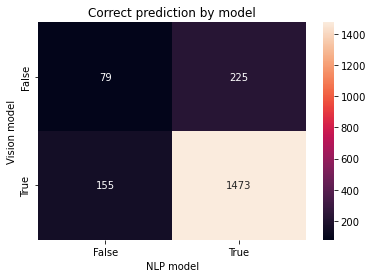

In [24]:
g = combo.groupby(by=["img_corr", "nlp_corr"], as_index=False).agg({"id_video": "count"})
g.rename(columns={"id_video": "n_videos"}, inplace=True)
p = g.pivot(index="img_corr", columns="nlp_corr", values="n_videos")
sb.heatmap(p, annot=True, fmt="d")
plt.xlabel("NLP model")
plt.ylabel("Vision model")
plt.title("Correct prediction by model")
plt.savefig(os.path.join(p_dir, "model prediction correctness comparison.jpg"))
plt.show()

In [21]:
combo["pred_img_b"] = combo.pred == "very high"
combo["pred_nlp_b"] = combo.pred_nlp == "very high"
corr = combo.pred_img_b.corr(combo.pred_nlp_b)
print("Correlation between models: {:0.4f}".format(corr))

Correlation between models: 0.6098


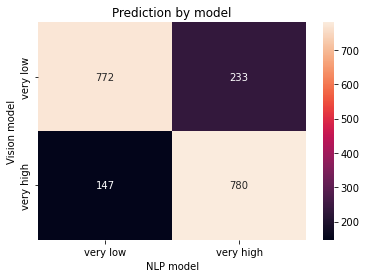

In [25]:
g2 = combo.groupby(by=["pred", "pred_nlp"], as_index=False).agg({"id_video": "count"})
g2.rename(columns={"id_video": "n_videos"}, inplace=True)
p = g2.pivot(index="pred", columns="pred_nlp", values="n_videos")
sb.heatmap(p, annot=True, fmt="d")
plt.xlabel("NLP model")
plt.ylabel("Vision model")
plt.title("Prediction by model")
plt.savefig(os.path.join(p_dir, "model prediction comparison.jpg"))
plt.show()